In [13]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB

In [14]:
songs_df = pd.read_csv("songs.csv")
songs_df

,Index,Title,Artist,Top Genre,Year,Month,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004.0,10,157.0,30.0,53.0,-14.0,11.0,68.0,201,94.0,3.0,71.0
1,2,Black Night,Deep Purple,album rock,2000.0,3,135.0,79.0,50.0,-11.0,17.0,81.0,207,17.0,7.0,39.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6,168.0,69.0,66.0,-9.0,7.0,52.0,341,2.0,17.0,69.0
3,4,The Pretender,Foo Fighters,alternative metal,2007.0,1,173.0,96.0,43.0,-4.0,3.0,37.0,269,0.0,4.0,76.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8,106.0,82.0,58.0,-5.0,10.0,87.0,256,1.0,3.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958.0,4,94.0,21.0,NaN,-12.0,11.0,72.0,128,84.0,7.0,63.0
1990,1991,Hound Dog,Elvis Presley,adult standards,1958.0,6,175.0,76.0,NaN,-8.0,76.0,95.0,136,73.0,6.0,69.0
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959.0,4,168.0,80.0,NaN,-9.0,31.0,97.0,162,74.0,7.0,74.0
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959.0,10,174.0,26.0,45.0,-13.0,7.0,60.0,324,54.0,4.0,65.0


In [15]:
songs_df.drop(['Index', 'Title', 'Month', 'Popularity', 'Artist'], axis=1, inplace=True)
songs_df

,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness
0,adult standards,2004.0,157.0,30.0,53.0,-14.0,11.0,68.0,201,94.0,3.0
1,album rock,2000.0,135.0,79.0,50.0,-11.0,17.0,81.0,207,17.0,7.0
2,alternative hip hop,2001.0,168.0,69.0,66.0,-9.0,7.0,52.0,341,2.0,17.0
3,alternative metal,2007.0,173.0,96.0,43.0,-4.0,3.0,37.0,269,0.0,4.0
4,classic rock,2002.0,106.0,82.0,58.0,-5.0,10.0,87.0,256,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1989,adult standards,1958.0,94.0,21.0,NaN,-12.0,11.0,72.0,128,84.0,7.0
1990,adult standards,1958.0,175.0,76.0,NaN,-8.0,76.0,95.0,136,73.0,6.0
1991,blues rock,1959.0,168.0,80.0,NaN,-9.0,31.0,97.0,162,74.0,7.0
1992,bebop,1959.0,174.0,26.0,45.0,-13.0,7.0,60.0,324,54.0,4.0


In [16]:
cols = songs_df.columns.tolist()
cols = cols[1:] + cols[0:1]
songs_df = songs_df[cols]
songs_df

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Top Genre
0,2004.0,157.0,30.0,53.0,-14.0,11.0,68.0,201,94.0,3.0,adult standards
1,2000.0,135.0,79.0,50.0,-11.0,17.0,81.0,207,17.0,7.0,album rock
2,2001.0,168.0,69.0,66.0,-9.0,7.0,52.0,341,2.0,17.0,alternative hip hop
3,2007.0,173.0,96.0,43.0,-4.0,3.0,37.0,269,0.0,4.0,alternative metal
4,2002.0,106.0,82.0,58.0,-5.0,10.0,87.0,256,1.0,3.0,classic rock
...,...,...,...,...,...,...,...,...,...,...,...
1989,1958.0,94.0,21.0,NaN,-12.0,11.0,72.0,128,84.0,7.0,adult standards
1990,1958.0,175.0,76.0,NaN,-8.0,76.0,95.0,136,73.0,6.0,adult standards
1991,1959.0,168.0,80.0,NaN,-9.0,31.0,97.0,162,74.0,7.0,blues rock
1992,1959.0,174.0,26.0,45.0,-13.0,7.0,60.0,324,54.0,4.0,bebop


In [17]:
songs_df['Length (Duration)'] = songs_df['Length (Duration)'].str.replace(",","").astype(float)
songs_df

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Top Genre
0,2004.0,157.0,30.0,53.0,-14.0,11.0,68.0,201.0,94.0,3.0,adult standards
1,2000.0,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,album rock
2,2001.0,168.0,69.0,66.0,-9.0,7.0,52.0,341.0,2.0,17.0,alternative hip hop
3,2007.0,173.0,96.0,43.0,-4.0,3.0,37.0,269.0,0.0,4.0,alternative metal
4,2002.0,106.0,82.0,58.0,-5.0,10.0,87.0,256.0,1.0,3.0,classic rock
...,...,...,...,...,...,...,...,...,...,...,...
1989,1958.0,94.0,21.0,NaN,-12.0,11.0,72.0,128.0,84.0,7.0,adult standards
1990,1958.0,175.0,76.0,NaN,-8.0,76.0,95.0,136.0,73.0,6.0,adult standards
1991,1959.0,168.0,80.0,NaN,-9.0,31.0,97.0,162.0,74.0,7.0,blues rock
1992,1959.0,174.0,26.0,45.0,-13.0,7.0,60.0,324.0,54.0,4.0,bebop


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Beats Per Minute (BPM)'}>,
        <AxesSubplot:title={'center':'Energy'}>],
       [<AxesSubplot:title={'center':'Danceability'}>,
        <AxesSubplot:title={'center':'Loudness (dB)'}>,
        <AxesSubplot:title={'center':'Liveness'}>],
       [<AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Length (Duration)'}>,
        <AxesSubplot:title={'center':'Acousticness'}>],
       [<AxesSubplot:title={'center':'Speechiness'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

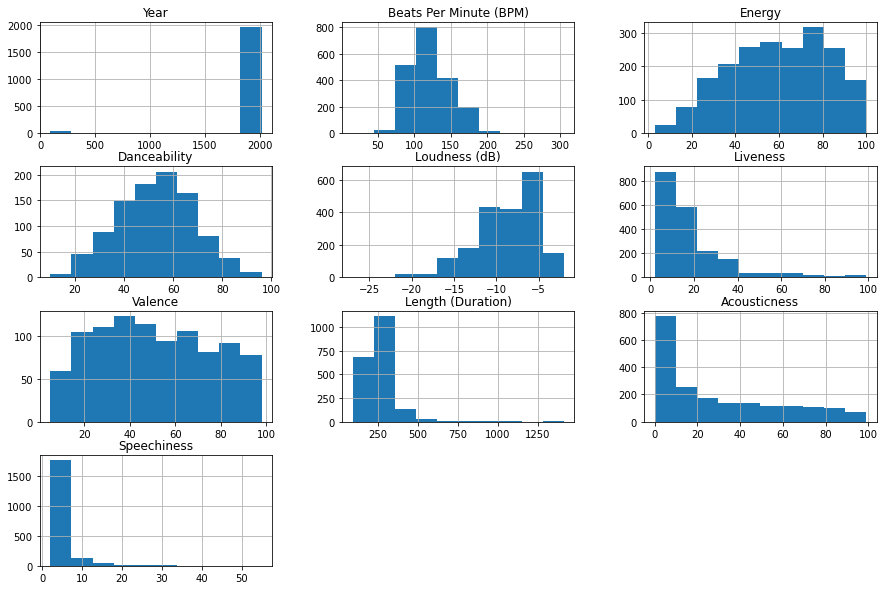

In [18]:
songs_df.hist(figsize=(15,10))

In [19]:
songs_df[songs_df['Year'] < 1000]

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Top Genre
1567,92.0,89.0,83.0,NaN,-4.0,3.0,NaN,314.0,3.0,30.0,alternative metal
1568,92.0,110.0,87.0,NaN,-6.0,23.0,NaN,438.0,0.0,6.0,album rock
1569,92.0,165.0,60.0,NaN,-6.0,21.0,NaN,394.0,10.0,3.0,glam metal
1570,92.0,94.0,32.0,NaN,-10.0,12.0,NaN,320.0,62.0,3.0,alternative rock
1571,92.0,106.0,67.0,NaN,-7.0,9.0,NaN,243.0,2.0,3.0,album rock
1572,92.0,94.0,52.0,NaN,-12.0,94.0,NaN,289.0,32.0,5.0,album rock
1573,92.0,67.0,21.0,NaN,-13.0,8.0,NaN,271.0,84.0,4.0,dance pop
1574,92.0,114.0,39.0,57.0,-11.0,10.0,NaN,258.0,80.0,3.0,alternative rock
1575,92.0,74.0,30.0,43.0,-14.0,23.0,NaN,278.0,70.0,3.0,cyberpunk
1576,92.0,101.0,83.0,31.0,-8.0,9.0,NaN,207.0,0.0,4.0,alternative metal


In [20]:
songs_df['Year'] = songs_df['Year'].replace(92.0,1992.0)
songs_df[songs_df['Year'] < 1000]

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Top Genre


In [22]:
songs_df.shape

(1994, 11)

In [23]:
songs_df.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Top Genre
0,2004.0,157.0,30.0,53.0,-14.0,11.0,68.0,201.0,94.0,3.0,adult standards
1,2000.0,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,album rock
2,2001.0,168.0,69.0,66.0,-9.0,7.0,52.0,341.0,2.0,17.0,alternative hip hop
3,2007.0,173.0,96.0,43.0,-4.0,3.0,37.0,269.0,0.0,4.0,alternative metal
4,2002.0,106.0,82.0,58.0,-5.0,10.0,87.0,256.0,1.0,3.0,classic rock


In [24]:
series = songs_df['Top Genre'].value_counts()
genreslessthan60 = series[series < 60]
songs_df = songs_df[~songs_df['Top Genre'].isin(genreslessthan60.index)]

In [25]:
# Model without tuning
dataset = songs_df.values

X = dataset[:,0:len(songs_df.columns)-1]
Y = dataset[:,len(songs_df.columns)-1]

X[X == '?'] = np.nan
X = X.astype(float)

label_encoded_Y = LabelEncoder().fit_transform(Y)

seed = 13
test_size = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X, label_encoded_Y, test_size = test_size, random_state = seed)

model = XGBClassifier()
model.fit(X_train, Y_train)
print(model)

predictions = model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)

print(f'Accuracy: {accuracy * 100.0:.2f}%')

c:\Users\Logan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:12:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbo

In [26]:
songs_df['Top Genre'].value_counts()

album rock           411
adult standards      122
dutch pop             88
alternative rock      86
dance pop             82
dutch indie           75
alternative metal     68
Name: Top Genre, dtype: int64

In [27]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant')
imputed_df = songs_df.copy()
for index, value in imputed_df.isna().sum().items():
    if value > 0 and pd.api.types.is_numeric_dtype(songs_df[index]):
        songs_df[index] = imp.fit_transform(songs_df[[index]])

C:\Users\Logan\AppData\Local\Temp\ipykernel_272772\1010816449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df[index] = imp.fit_transform(songs_df[[index]])
C:\Users\Logan\AppData\Local\Temp\ipykernel_272772\1010816449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df[index] = imp.fit_transform(songs_df[[index]])
C:\Users\Logan\AppData\Local\Temp\ipykernel_272772\1010816449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [28]:
# Model with tuning
dataset = songs_df.values

X = dataset[:,0:len(songs_df.columns)-1]
Y = dataset[:,len(songs_df.columns)-1]

label_encoded_Y = LabelEncoder().fit_transform(Y)

seed = 7
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, label_encoded_Y, test_size = test_size, random_state = seed)

model = XGBClassifier(max_depth=1, learning_rate=0.25, n_estimators=175)
model.fit(X_train, Y_train)
print(model)

predictions = model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)

print(f'Accuracy: {accuracy * 100.0:.2f}%')

c:\Users\Logan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:13:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=175, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=No

In [29]:
gnb = GaussianNB()

y_pred = gnb.fit(X_train, Y_train).predict(X_test)

num_mislabeled = ((Y_test != y_pred).sum() / X_test.shape[0]) * 100
print(f"Number of mislabeled points: {num_mislabeled:.2f}%")
print(f"Accuracy score: {100-num_mislabeled:.2f}%")

Number of mislabeled points: 54.79%
Accuracy score: 45.21%
